Grupo:
- Beatriz de Araújo Andrade (baa)
- Thiago de Souza Farias (tsf)

## Descrição do Projeto

Este projeto tem como objetivo analisar a relação entre diversas informações sobre filmes, visando entender melhor os padrões e tendências dentro da indústria cinematográfica. O conjunto de dados examinado contém informações detalhadas sobre os filmes, como popularidade, gênero, orçamento, receita, votos, data de lançamento e duração.

Para enriquecer nossa análise, utilizamos a API do JustWatch para coletar os nomes das plataformas de streaming que disponibilizam cada filme, integrando essa informação ao dataset para uma análise posterior.

O projeto está dividido em etapas distintas:

1. **Coleta de Dados:** Inicialmente, coletamos os nomes das plataformas de streaming que disponibilizam cada filme, utilizando a API do JustWatch. (outro notebook), integrando-os ao dataset do TMDB.

2. **Pré-processamento dos Dados:** Nesta etapa, realizamos diversas tarefas de preparação dos dados, como definição dos tipos de dados, tratamento de dados ausentes, normalização e discretização, e limpeza de dados univariada, bivariada e multivariada.

3. **Análise Descritiva:** Apresentamos estatísticas descritivas dos dados por meio de visualizações, proporcionando insights sobre as características e distribuições das variáveis analisadas.

4. **Teste de Hipóteses:** Realizamos testes de hipóteses para comparar valores de categorias e visualizar diferenças significativas entre os grupos analisados, ajudando a confirmar ou refutar suposições sobre as relações entre as variáveis.

Este projeto visa fornecer uma compreensão mais profunda das dinâmicas presentes na indústria cinematográfica, explorando como diferentes variáveis estão inter-relacionadas e contribuem para o sucesso e recepção dos filmes.

## Preparação do Ambiente e Carregamento dos dados

In [248]:
import pandas as pd
import ast
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from matplotlib import pyplot as plt
import seaborn as sns

In [249]:
df = pd.read_csv('movies_with_streamings.csv')

## Contextualização dos dados

In [250]:
df.shape

(10866, 22)

In [251]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,streaming_services
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,"['Apple TV', 'Max', 'Google Play Movies', 'Max..."
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,"['Apple TV', 'Max', 'TBS', 'tru TV', 'Google P..."
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,"['Apple TV', 'Hulu', 'Google Play Movies', 'Mi..."
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,"['fuboTV', 'Apple TV', 'TBS', 'FXNow', 'tru TV..."
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,"['Apple TV', 'Max', 'Google Play Movies', 'Max..."


In [252]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'streaming_services'],
      dtype='object')

Ao realizar uma análise preliminar do nosso conjunto de dados, observamos que ele contém 10.866 amostras, com informações divididas em 6 variáveis nominais, 7 variáveis categóricas, 8 variáveis numéricas e 1 variável temporal.

- **Variável nominal:**
  - **original_title**: Título original do filme.
  - **id**: Identificador único do filme.
  - **imdb_id**: Identificador IMDb do filme.
  - **tagline**: Frase de efeito associada ao filme.
  - **overview**: Resumo do filme.
  - **homepage**: Endereço do website do filme.


- **Variáveis categóricas:**
  - **cast**: Lista de atores principais do filme.
  - **director**: Nome do diretor do filme.
  - **keywords**: Palavras-chave associadas ao filme.
  - **genres**: Gêneros aos quais o filme pertence.
  - **production_companies**: Lista das produtoras que participaram do filme.
  - **streaming_services**: Nomes das plataformas de streaming que disponibilizam o filme.
  - **release_year**: Ano de lançamento do filme.

- **Variáveis numéricas:**
  - **popularity**: Medida de popularidade do filme.
  - **budget**: Orçamento do filme em dólares.
  - **revenue**: Receita gerada pelo filme em dólares.
  - **runtime**: Duração do filme em minutos.
  - **vote_count**: Número de votos recebidos.
  - **vote_average**: Média das avaliações recebidas (valor de 0 a 10, baseado na plataforma IMDb).
  - **budget_adj**: Orçamento ajustado pela inflação.
  - **revenue_adj**: Receita ajustada pela inflação.

- **Variável temporal**
    - **release_date**:Data de lançamento do filme.


## Pré-processamento dos Dados

### Remoção de colunas irrelevantes

Ao avaliar as variáveis do dataset, observamos que algumas são desnecessárias para a análise e outras representam informações redundantes. Portanto, removeremos do DataFrame as seguintes colunas:

- **id**, **imdb_id**, **tagline**, **overview**, **homepage**, **original_title**, **keywords**, **cast**, **director**, **production_company**, **release_date**: Estas colunas são consideradas desnecessárias para a análise.
- **budget** e **revenue**: Estas colunas serão removidas porque suas versões ajustadas para a inflação, **budget_adj** e **revenue_adj**, já estão presentes. As versões ajustadas fornecem uma base comum para comparar filmes, independentemente do período em que foram lançados.

Essa simplificação ajudará a focar na análise das variáveis mais relevantes e a evitar redundâncias no dataset.

In [253]:
col_to_drop = ['id', 'imdb_id', 'tagline', 'overview', 'homepage', 'original_title', 'keywords', 'cast', 'director', 'production_companies', 'release_date', 'budget', 'revenue']
df.drop(columns=col_to_drop, inplace=True)
df.head()

,popularity,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,streaming_services
0,32.985763,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,"['Apple TV', 'Max', 'Google Play Movies', 'Max..."
1,28.419936,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08,"['Apple TV', 'Max', 'TBS', 'tru TV', 'Google P..."
2,13.112507,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08,"['Apple TV', 'Hulu', 'Google Play Movies', 'Mi..."
3,11.173104,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09,"['fuboTV', 'Apple TV', 'TBS', 'FXNow', 'tru TV..."
4,9.335014,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09,"['Apple TV', 'Max', 'Google Play Movies', 'Max..."


In [254]:
df.columns

Index(['popularity', 'runtime', 'genres', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj', 'streaming_services'],
      dtype='object')

### Tratamento de dados replicados

Antes de definirmos os tipos de dados, é necessário tratá-los, especialmente considerando a possibilidade de duplicações. Isso se deve ao fato de que uma das variáveis será convertida em uma lista, e esse tipo de dado é considerado "unhashable", o que pode interferir no funcionamento adequado da função "duplicated", que é utilizada para identificar duplicatas nos dados.

**Verificando a existência de dados duplicados e removendo-os**

In [255]:
df.duplicated().sum()

1

In [256]:
df.drop_duplicates(inplace=True)
df.shape

(10865, 9)

### Definição dos tipos dos dados

In [257]:
df.dtypes

popularity            float64
runtime                 int64
genres                 object
vote_count              int64
vote_average          float64
release_year            int64
budget_adj            float64
revenue_adj           float64
streaming_services     object
dtype: object

Ao examinarmos os tipos das nossas variáveis, notamos que as variáveis categóricas "genres", "streaming_services" e "release_year" não foram definidas adequadamente.

Dessa forma, vamos implementar as seguintes modificações:

- A variável "release_year" será convertida para o tipo categoria.
- As variáveis "genres" e "streaming_services" terão seus valores transformados em listas para serem tratadas posteriormente.

Para a variável "genres", as categorias estão agrupadas em uma única string, com os gêneros separados por "|". Portanto, iremos dividir a string usando o delimitador mencionado e converter os valores em uma lista.

No caso da variável "streaming_services", as categorias já estão em formato de lista, mas foram importadas como tipo "object", o que, a priori, significa que são tratadas como strings. Além disso, iremos remover das listas os nomes das plataformas de streaming que não serão analisadas. As plataformas que serão analisadas são: Netflix, Max, Amazon Prime, Disney Plus e Hulu, as mais populares no Brasil.

**Definindo o tipo de release_date como "category"**

In [258]:
df['release_year'] = df['release_year'].astype("category")
df['release_year'] = df['release_year'].cat.codes
df.head()

,popularity,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,streaming_services
0,32.985763,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,55,1.379999e+08,1.392446e+09,"['Apple TV', 'Max', 'Google Play Movies', 'Max..."
1,28.419936,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,55,1.379999e+08,3.481613e+08,"['Apple TV', 'Max', 'TBS', 'tru TV', 'Google P..."
2,13.112507,119,Adventure|Science Fiction|Thriller,2480,6.3,55,1.012000e+08,2.716190e+08,"['Apple TV', 'Hulu', 'Google Play Movies', 'Mi..."
3,11.173104,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,55,1.839999e+08,1.902723e+09,"['fuboTV', 'Apple TV', 'TBS', 'FXNow', 'tru TV..."
4,9.335014,137,Action|Crime|Thriller,2947,7.3,55,1.747999e+08,1.385749e+09,"['Apple TV', 'Max', 'Google Play Movies', 'Max..."


In [259]:
len(df['release_year'].unique())

56

Observa-se que a variável "release_year" apresenta 56 categorias distintas. Isso representa um desafio futuro, pois a aplicação de one-hot encoding para todas as categorias seria inviável, resultando em um acréscimo de 56 colunas no conjunto de dados. Esse aumento significativo de dimensões dificulta o treinamento do modelo e pode comprometer sua performance.

**Transformando os valores de "genres" em listas**

In [260]:
df['genres'] = df['genres'].str.split('|')
df.head()

,popularity,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,streaming_services
0,32.985763,124,"[Action, Adventure, Science Fiction, Thriller]",5562,6.5,55,1.379999e+08,1.392446e+09,"['Apple TV', 'Max', 'Google Play Movies', 'Max..."
1,28.419936,120,"[Action, Adventure, Science Fiction, Thriller]",6185,7.1,55,1.379999e+08,3.481613e+08,"['Apple TV', 'Max', 'TBS', 'tru TV', 'Google P..."
2,13.112507,119,"[Adventure, Science Fiction, Thriller]",2480,6.3,55,1.012000e+08,2.716190e+08,"['Apple TV', 'Hulu', 'Google Play Movies', 'Mi..."
3,11.173104,136,"[Action, Adventure, Science Fiction, Fantasy]",5292,7.5,55,1.839999e+08,1.902723e+09,"['fuboTV', 'Apple TV', 'TBS', 'FXNow', 'tru TV..."
4,9.335014,137,"[Action, Crime, Thriller]",2947,7.3,55,1.747999e+08,1.385749e+09,"['Apple TV', 'Max', 'Google Play Movies', 'Max..."


In [261]:
#"Explode" as listas de gêneros para criar uma nova linha para cada elemento da lista
exploded_genres = df.explode('genres')

#Obtem todos os valores únicos da coluna 'genres'
all_genres = exploded_genres['genres'].unique()
print(f"Número de gêneros analisados: {len(all_genres)}")
all_genres

Número de gêneros analisados: 21


array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV Movie', nan, 'Foreign'], dtype=object)

Aplicar One Hot Encoding na coluna de gênero iria gerar 20 colunas novas, já que uma das colunas identificadas foi "nan". Portanto, como a grande maioria dos modelos não consegue lidar com listas e dados nominais, iremos usar essa técnica mais adiante para que isso não seja um problema.

**Conversão de streaming_services de string para lista**

In [262]:
df['streaming_services'] = df['streaming_services'].apply(ast.literal_eval)

**Filtrando as listas de streaming services para manter apenas os valores de interesse**

In [263]:
#Apresenta todas as plataformas de streaming abarcadas no dataset
set(y for x in df['streaming_services'] for y in x)

{'ALLBLK Apple TV channel',
 'AMC',
 'AMC Plus Apple TV Channel ',
 'AMC on Demand',
 'AMC+',
 'AMC+ Amazon Channel',
 'AMC+ Roku Premium Channel',
 'ARROW',
 'Acorn TV',
 'Acorn TV Apple TV',
 'AcornTV Amazon Channel',
 'Amazon Prime Video',
 'Amazon Prime Video with Ads',
 'Amazon Video',
 'Apple TV',
 'Apple TV Plus',
 'AsianCrush',
 'Atom Tickets',
 'B&B Theatres',
 'BBC America',
 'BET+  Apple TV channel',
 'Bet+ Amazon Channel',
 'Boomerang',
 'Boomerang Amazon Channel',
 'BritBox',
 'BritBox Amazon Channel',
 'Britbox Apple TV Channel ',
 'BroadwayHD',
 'Chai Flicks',
 'Cinemark',
 'Cinemax Amazon Channel',
 'Cinemax Apple TV Channel',
 'Cinepolis USA',
 'Cineverse',
 'Classix',
 'Cohen Media Amazon Channel',
 'Crackle',
 'Criterion Channel',
 'Crunchyroll',
 'Crunchyroll Amazon Channel',
 'Cultpix',
 'Curiosity Stream',
 'CuriosityStream Apple TV Channel',
 'DOCSVILLE',
 'Dekkoo',
 'Disney Plus',
 'DisneyNOW',
 'DistroTV',
 'DocAlliance Films',
 'Dogwoof On Demand',
 'Eros Now'

In [264]:
#Plataformas de streaming a serem analisadas
main_streaming_platforms = {'Netflix', 'Max', 'Amazon Prime Video', 'Disney Plus', 'Hulu'}

#Filtra as listas das plataformas de streaming, mantendo apenas os itens principais
df['streaming_services'] = df['streaming_services'].apply(lambda x: [service for service in x if service in main_streaming_platforms])

df.head()

,popularity,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,streaming_services
0,32.985763,124,"[Action, Adventure, Science Fiction, Thriller]",5562,6.5,55,1.379999e+08,1.392446e+09,[Max]
1,28.419936,120,"[Action, Adventure, Science Fiction, Thriller]",6185,7.1,55,1.379999e+08,3.481613e+08,[Max]
2,13.112507,119,"[Adventure, Science Fiction, Thriller]",2480,6.3,55,1.012000e+08,2.716190e+08,[Hulu]
3,11.173104,136,"[Action, Adventure, Science Fiction, Fantasy]",5292,7.5,55,1.839999e+08,1.902723e+09,[Disney Plus]
4,9.335014,137,"[Action, Crime, Thriller]",2947,7.3,55,1.747999e+08,1.385749e+09,[Max]


Como estamos analisando apenas as plataformas de streaming mais famosas no Brasil, essa variável apresenta apenas 5 categorias. Porém, como os filmes podem ser disponibilizados por mais de um serviço os valores são listas. Por isso, também aplicaremos o One Hot Encoding a esta coluna.

In [265]:
df.dtypes

popularity            float64
runtime                 int64
genres                 object
vote_count              int64
vote_average          float64
release_year             int8
budget_adj            float64
revenue_adj           float64
streaming_services     object
dtype: object

Após esta etapa, as colunas "genres" e "streaming_services" ainda não possuem tipos adequados. No entanto, isso será corrigido posteriormente, durante o processo de codificação.

### Tratamento de Dados Ausentes e Codificação das Variáveis Categóricas

Antes de prosseguirmos com a codificação das variáveis categóricas, é necessário verificar se alguma delas, ou outras colunas, contêm dados ausentes, uma vez que não é possível codificar valores "nan".

**Verificando a existência de dados ausentes**

In [266]:
df.isna().sum()

popularity             0
runtime                0
genres                23
vote_count             0
vote_average           0
release_year           0
budget_adj             0
revenue_adj            0
streaming_services     0
dtype: int64

É notável que apenas a coluna "genres" apresentou dados ausentes, 23 instâncias. Dessa forma, iremos tratá-los a partir da técnica de imputação por classificação.

In [267]:
df['genres'].head()

0    [Action, Adventure, Science Fiction, Thriller]
1    [Action, Adventure, Science Fiction, Thriller]
2            [Adventure, Science Fiction, Thriller]
3     [Action, Adventure, Science Fiction, Fantasy]
4                         [Action, Crime, Thriller]
Name: genres, dtype: object

Para treinar um modelo de classificação com múltiplas saídas, dado que um filme pode ser associado a mais de um gênero, é necessário codificar os dados categóricos que não possuem valores ausentes. Para isso, utilizaremos o método de One Hot Encoding.

**Agrupamento e Codificação de "release_year"**

Para reduzir a quantidade de categorias na variável "release_year", agruparemos os anos de lançamento em intervalos fixos de 4 anos.

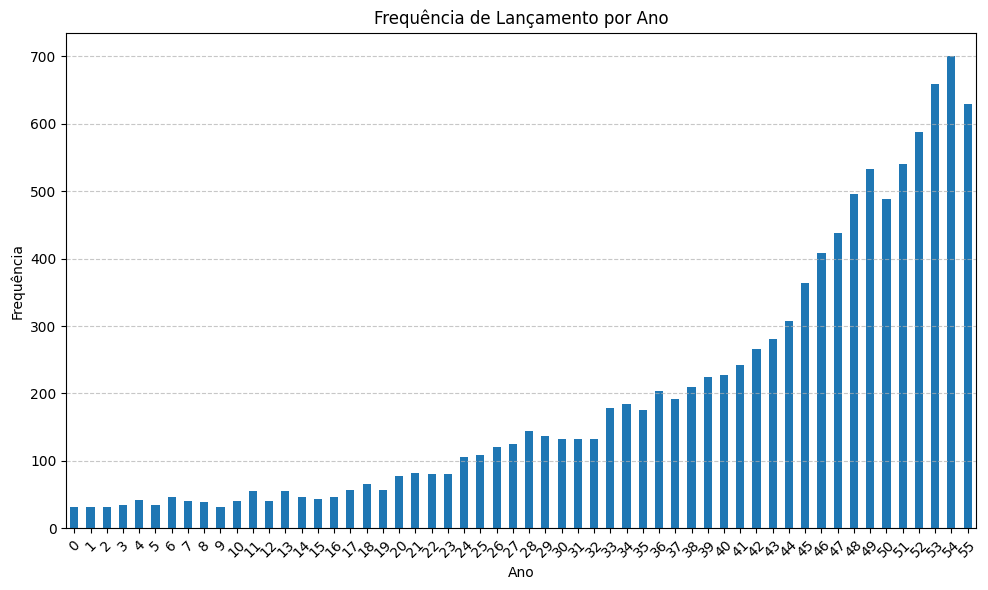

In [268]:
# Contagem de frequência dos anos de lançamento
year_counts = df['release_year'].value_counts().sort_index()

# Plotagem do gráfico de barras
plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar')
plt.title('Frequência de Lançamento por Ano')
plt.xlabel('Ano')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Vamos agrupar os dados em intervalos de 4 anos, pois, ao analisar o gráfico, observamos que a maioria dos grupos não apresenta uma variação muito grande no número de filmes lançados.

In [269]:
# Obtendo os valores únicos de release_year
unique_years = df['release_year'].unique()

# Criando faixas de 4 anos
bins = np.arange(min(unique_years), max(unique_years) + 5, 4)

# Discretizando os valores de release_year e obtendo os índices dos intervalos
df['release_year_discretized'] = pd.cut(df['release_year'], bins=bins, labels=False, right=False)


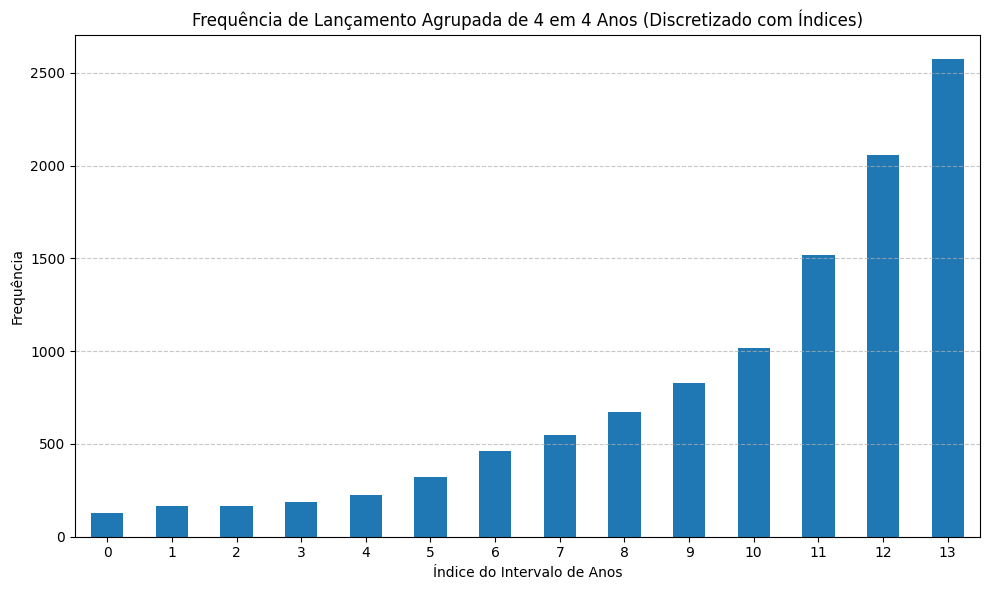

In [270]:
# Contagem de frequência dos intervalos
year_counts_grouped = df['release_year_discretized'].value_counts().sort_index()

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
year_counts_grouped.plot(kind='bar')
plt.title('Frequência de Lançamento Agrupada de 4 em 4 Anos (Discretizado com Índices)')
plt.xlabel('Índice do Intervalo de Anos')
plt.ylabel('Frequência')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [271]:
# Aplicando o one-hot encoding
df_one_hot = pd.get_dummies(df['release_year_discretized'], prefix='release_year').astype('int')

# Concatenando o DataFrame original com o DataFrame one-hot encoded
df = pd.concat([df, df_one_hot], axis=1)
df.drop(columns=['release_year', 'release_year_discretized'], inplace=True)
df.head()

,popularity,runtime,genres,vote_count,vote_average,budget_adj,revenue_adj,streaming_services,release_year_0,release_year_1,...,release_year_4,release_year_5,release_year_6,release_year_7,release_year_8,release_year_9,release_year_10,release_year_11,release_year_12,release_year_13
0,32.985763,124,"[Action, Adventure, Science Fiction, Thriller]",5562,6.5,1.379999e+08,1.392446e+09,[Max],0,0,...,0,0,0,0,0,0,0,0,0,1
1,28.419936,120,"[Action, Adventure, Science Fiction, Thriller]",6185,7.1,1.379999e+08,3.481613e+08,[Max],0,0,...,0,0,0,0,0,0,0,0,0,1
2,13.112507,119,"[Adventure, Science Fiction, Thriller]",2480,6.3,1.012000e+08,2.716190e+08,[Hulu],0,0,...,0,0,0,0,0,0,0,0,0,1
3,11.173104,136,"[Action, Adventure, Science Fiction, Fantasy]",5292,7.5,1.839999e+08,1.902723e+09,[Disney Plus],0,0,...,0,0,0,0,0,0,0,0,0,1
4,9.335014,137,"[Action, Crime, Thriller]",2947,7.3,1.747999e+08,1.385749e+09,[Max],0,0,...,0,0,0,0,0,0,0,0,0,1


**Codificação Binária de "Streaming Services"**

In [272]:
# Codifica os possíveis valores de streaming services para binário
mlb_services = MultiLabelBinarizer()
services_encoded = mlb_services.fit_transform(df['streaming_services'])

# Separa os dados de streaming services codificados
services_df = pd.DataFrame(services_encoded, columns=mlb_services.classes_)
services_df

,Amazon Prime Video,Disney Plus,Hulu,Max,Netflix
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,1,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
10860,1,0,0,0,0
10861,0,0,0,0,0
10862,0,0,0,0,0
10863,0,0,0,0,0


In [273]:
# Adiciona as colunas das categorias de serviço de streaming ao DataFrame original
df = pd.concat([df.reset_index(drop=True), services_df.reset_index(drop=True)], axis=1)

# Remove a coluna 'streaming_services', pois ela não será mais necessária após a codificação
df.drop(columns=['streaming_services'], inplace=True)
df.head()

,popularity,runtime,genres,vote_count,vote_average,budget_adj,revenue_adj,release_year_0,release_year_1,release_year_2,...,release_year_9,release_year_10,release_year_11,release_year_12,release_year_13,Amazon Prime Video,Disney Plus,Hulu,Max,Netflix
0,32.985763,124,"[Action, Adventure, Science Fiction, Thriller]",5562,6.5,1.379999e+08,1.392446e+09,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,28.419936,120,"[Action, Adventure, Science Fiction, Thriller]",6185,7.1,1.379999e+08,3.481613e+08,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,13.112507,119,"[Adventure, Science Fiction, Thriller]",2480,6.3,1.012000e+08,2.716190e+08,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,11.173104,136,"[Action, Adventure, Science Fiction, Fantasy]",5292,7.5,1.839999e+08,1.902723e+09,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,9.335014,137,"[Action, Crime, Thriller]",2947,7.3,1.747999e+08,1.385749e+09,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [274]:
df.columns

Index(['popularity', 'runtime', 'genres', 'vote_count', 'vote_average',
       'budget_adj', 'revenue_adj', 'release_year_0', 'release_year_1',
       'release_year_2', 'release_year_3', 'release_year_4', 'release_year_5',
       'release_year_6', 'release_year_7', 'release_year_8', 'release_year_9',
       'release_year_10', 'release_year_11', 'release_year_12',
       'release_year_13', 'Amazon Prime Video', 'Disney Plus', 'Hulu', 'Max',
       'Netflix'],
      dtype='object')

**Tratamento dos dados ausentes em "genres"**

Primeiro, separamos os dados ausentes do restante do DataFrame. Em seguida, codificamos os valores dos gêneros de filmes para que possam ser utilizados pelo modelo, que será treinado para preencher esses valores ausentes.

In [275]:
#Dataframe com valores ausentes para a coluna "genres"
df_na = df[df['genres'].isna()]
#Dataframe sem valores ausentes para a coluna "genres"
df_not_na = df[~df['genres'].isna()]

In [276]:
#Codifica os possíveis valores de gêneros para binário
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(df_not_na['genres'])
genres_encoded

array([[1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Lidando apenas com dados numéricos agora, separamos as características (features) e o alvo (target) - que são os gêneros - e empregamos um pipeline para simplificar a normalização dos dados e a construção do modelo. Optamos por utilizar um modelo de Random Forest com múltiplas saídas para esta tarefa.

In [277]:
#Separa os dados em features e target
X = df_not_na.drop(columns=['genres'])
y = pd.DataFrame(genres_encoded, columns=mlb.classes_)

In [278]:
#Features numéricas
numeric_features = X.select_dtypes(exclude=['object']).columns

#Pipeline para normalizar as variáveis numéricas
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

#Combina as transformações em uma única transformação
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ],
    remainder='passthrough'  #Passa todas as outras colunas não especificadas
)


In [279]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MultiOutputClassifier(RandomForestClassifier(random_state=42)))
])

In [280]:
#Treinamento do modelo de multiclassificação
model.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['popularity', 'runtime', 'vote_count', 'vote_average', 'budget_adj',
       'revenue_adj', 'release_year_0', 'release_year_1', 'release_year_2',
       'release_year_3', 'release_year_4', 'release_year_5', 'release_year_6',
       'release_year_7', 'release_year_8', 'release_year_9', 'release_year_10',
       'release_year_11', 'release_year_12', 'release_year_13',
       'Amazon Prime Video', 'Disney Plus', 'Hulu', 'Max', 'Netflix'],
      dtype='object'))])),
                ('classifier',
                 MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42)))])

Por fim, utilizando o modelo treinado, substituímos os valores ausentes pelas previsões geradas e realizamos a codificação da coluna "genres".

In [281]:
#Previsão dos valores ausentes
X_na = df_na.drop(columns=['genres'])
y_pred = model.predict(X_na)
y_pred

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

In [282]:
#Converte as previsões de volta para o formato nominal
y_pred_decoded = mlb.inverse_transform(y_pred)
df_na['genres'] = [list(genres) for genres in y_pred_decoded]
df_na.head()

<ipython-input-282-25aa18691c0a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_na['genres'] = [list(genres) for genres in y_pred_decoded]


,popularity,runtime,genres,vote_count,vote_average,budget_adj,revenue_adj,release_year_0,release_year_1,release_year_2,...,release_year_9,release_year_10,release_year_11,release_year_12,release_year_13,Amazon Prime Video,Disney Plus,Hulu,Max,Netflix
424,0.244648,100,[Drama],21,6.1,0.0,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
620,0.129696,90,[],13,5.0,0.0,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
997,0.330431,44,[],13,6.8,0.0,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1712,0.302095,88,[Drama],57,7.4,0.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1897,0.020701,76,"[Animation, Documentary, Family]",11,7.0,0.0,0.0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


É possível observar que o modelo não conseguiu definir os gêneros de alguns filmes, nesse caso iremos removê-los do nosso dataframe.

In [283]:
df_na = df_na[df_na['genres'].apply(len) > 0]
df_na.head()

,popularity,runtime,genres,vote_count,vote_average,budget_adj,revenue_adj,release_year_0,release_year_1,release_year_2,...,release_year_9,release_year_10,release_year_11,release_year_12,release_year_13,Amazon Prime Video,Disney Plus,Hulu,Max,Netflix
424,0.244648,100,[Drama],21,6.1,0.0,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1712,0.302095,88,[Drama],57,7.4,0.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1897,0.020701,76,"[Animation, Documentary, Family]",11,7.0,0.0,0.0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2852,0.130018,110,[Drama],12,7.2,0.0,0.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3278,0.145331,96,[Drama],11,6.1,0.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [284]:
#Codificação binária dos gêneros para o dataframe df_na
genres_encoded_na = mlb.transform(df_na['genres'])
genres_df_na = pd.DataFrame(genres_encoded_na, columns=mlb.classes_)

In [285]:
#Codificação binária dos gêneros para o dataframe df_not_na
genres_encoded_not_na = mlb.transform(df_not_na['genres'])
genres_df_not_na = pd.DataFrame(genres_encoded_not_na, columns=mlb.classes_)

In [286]:
#Concatena as previsões com o dataframe original
df_na = pd.concat([df_na.reset_index(drop=True), genres_df_na.reset_index(drop=True)], axis=1)
df_not_na = pd.concat([df_not_na.reset_index(drop=True), genres_df_not_na.reset_index(drop=True)], axis=1)

In [287]:
#Concatena os dataframes com e sem valores ausentes
df_final = pd.concat([df_not_na, df_na], axis=0).reset_index(drop=True)
df_final.drop(columns=['genres'], inplace=True)
df_final.head()

,popularity,runtime,vote_count,vote_average,budget_adj,revenue_adj,release_year_0,release_year_1,release_year_2,release_year_3,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,32.985763,124,5562,6.5,1.379999e+08,1.392446e+09,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,28.419936,120,6185,7.1,1.379999e+08,3.481613e+08,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,13.112507,119,2480,6.3,1.012000e+08,2.716190e+08,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,11.173104,136,5292,7.5,1.839999e+08,1.902723e+09,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,9.335014,137,2947,7.3,1.747999e+08,1.385749e+09,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [288]:
df = df_final

### Discretização e normalização dos dados

In [289]:
df.dtypes

popularity            float64
runtime                 int64
vote_count              int64
vote_average          float64
budget_adj            float64
revenue_adj           float64
release_year_0          int64
release_year_1          int64
release_year_2          int64
release_year_3          int64
release_year_4          int64
release_year_5          int64
release_year_6          int64
release_year_7          int64
release_year_8          int64
release_year_9          int64
release_year_10         int64
release_year_11         int64
release_year_12         int64
release_year_13         int64
Amazon Prime Video      int64
Disney Plus             int64
Hulu                    int64
Max                     int64
Netflix                 int64
Action                  int64
Adventure               int64
Animation               int64
Comedy                  int64
Crime                   int64
Documentary             int64
Drama                   int64
Family                  int64
Fantasy   

Decidimos discretizar a variável "vote_average" para converter seu intervalo de 0-10 para 1-5. Para isso, consideraremos a dependência da variável "vote_average" em relação à "vote_count". Criaremos uma nova variável chamada "score", variando de 0 a 10, que representará essa relação. Dessa forma, filmes com um maior número de votos terão um valor mais próximo do "vote_average", refletindo a realidade com maior confiabilidade. Em seguida, discretizaremos essa nova variável para se ajustar ao padrão de classificação de 1 a 5 estrelas. Por fim, normalizaremos todas as variáveis.

**Definindo a variável de votação relativa e discretizando-a**

In [290]:
df[['vote_average', 'vote_count']].describe()

,vote_average,vote_count
count,10855.000000,10855.000000
mean,5.974095,217.584984
std,0.934501,575.877299
min,1.500000,10.000000
25%,5.400000,17.000000
50%,6.000000,38.000000
75%,6.600000,146.000000
max,9.200000,9767.000000


In [291]:
#Calcula a pontuação ponderada
df['weighted_score'] = df['vote_average'] * df['vote_count']

#Normaliza a pontuação ponderada para ter uma escala similar ao vote_average
max_weighted_score = df['weighted_score'].max()
df['weighted_score_normalized'] = round((df['weighted_score'] / max_weighted_score)*10, 1)
df.head()

,popularity,runtime,vote_count,vote_average,budget_adj,revenue_adj,release_year_0,release_year_1,release_year_2,release_year_3,...,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,weighted_score,weighted_score_normalized
0,32.985763,124,5562,6.5,1.379999e+08,1.392446e+09,0,0,0,0,...,0,0,0,1,0,1,0,0,36153.0,4.7
1,28.419936,120,6185,7.1,1.379999e+08,3.481613e+08,0,0,0,0,...,0,0,0,1,0,1,0,0,43913.5,5.7
2,13.112507,119,2480,6.3,1.012000e+08,2.716190e+08,0,0,0,0,...,0,0,0,1,0,1,0,0,15624.0,2.0
3,11.173104,136,5292,7.5,1.839999e+08,1.902723e+09,0,0,0,0,...,0,0,0,1,0,0,0,0,39690.0,5.1
4,9.335014,137,2947,7.3,1.747999e+08,1.385749e+09,0,0,0,0,...,0,0,0,0,0,1,0,0,21513.1,2.8


In [292]:
df.drop(columns=['vote_count', 'vote_average', 'weighted_score'], inplace=True)
df.rename(columns={'weighted_score_normalized': 'score'}, inplace=True)
df.head()

,popularity,runtime,budget_adj,revenue_adj,release_year_0,release_year_1,release_year_2,release_year_3,release_year_4,release_year_5,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,score
0,32.985763,124,1.379999e+08,1.392446e+09,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,4.7
1,28.419936,120,1.379999e+08,3.481613e+08,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,5.7
2,13.112507,119,1.012000e+08,2.716190e+08,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,2.0
3,11.173104,136,1.839999e+08,1.902723e+09,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,5.1
4,9.335014,137,1.747999e+08,1.385749e+09,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2.8


In [293]:
# Define os limites dos intervalos para cada categoria
bin_edges = [0, 2, 4, 6, 8, 10]

# Define os rótulos para cada categoria
bin_labels = [1, 2, 3, 4, 5]

# Discretiza a coluna 'score' com base nos limites dos intervalos e rótulos
df['5_star_score'] = pd.cut(df['score'], bins=bin_edges, labels=bin_labels, include_lowest=True, right=False)

df[['score', '5_star_score']].head()

,score,5_star_score
0,4.7,3
1,5.7,3
2,2.0,2
3,5.1,3
4,2.8,2


**Normalização das variáveis numéricas**

In [298]:
df.dtypes

popularity             float64
runtime                  int64
budget_adj             float64
revenue_adj            float64
release_year_0           int64
release_year_1           int64
release_year_2           int64
release_year_3           int64
release_year_4           int64
release_year_5           int64
release_year_6           int64
release_year_7           int64
release_year_8           int64
release_year_9           int64
release_year_10          int64
release_year_11          int64
release_year_12          int64
release_year_13          int64
Amazon Prime Video       int64
Disney Plus              int64
Hulu                     int64
Max                      int64
Netflix                  int64
Action                   int64
Adventure                int64
Animation                int64
Comedy                   int64
Crime                    int64
Documentary              int64
Drama                    int64
Family                   int64
Fantasy                  int64
Foreign 

Vamos delimitar as variáveis originalmente numéricas manualmente porque após todas as etapas anteriores todas as variáveis estão definidas por um tipo numérico.

In [299]:
numerical_features = ['popularity', 'runtime', 'budget_adj', 'revenue_adj', 'score']

In [301]:
#Instanciando o normalizador
scaler = MinMaxScaler()

#Aplicando a normalzação usando o MinMaxScaler
df[numerical_features] = scaler.fit_transform(df[numerical_features])

df.head()

,popularity,runtime,budget_adj,revenue_adj,release_year_0,release_year_1,release_year_2,release_year_3,release_year_4,release_year_5,...,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,score,5_star_score
0,1.000000,0.137778,0.324706,0.492531,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0.47,3
1,0.861582,0.133333,0.324706,0.123150,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0.57,3
2,0.397519,0.132222,0.238118,0.096076,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0.20,2
3,0.338724,0.151111,0.432941,0.673024,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0.51,3
4,0.283000,0.152222,0.411294,0.490162,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0.28,2


### Detecção e remoção de outliers

In [302]:
df.columns

Index(['popularity', 'runtime', 'budget_adj', 'revenue_adj', 'release_year_0',
       'release_year_1', 'release_year_2', 'release_year_3', 'release_year_4',
       'release_year_5', 'release_year_6', 'release_year_7', 'release_year_8',
       'release_year_9', 'release_year_10', 'release_year_11',
       'release_year_12', 'release_year_13', 'Amazon Prime Video',
       'Disney Plus', 'Hulu', 'Max', 'Netflix', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western',
       'score', '5_star_score'],
      dtype='object')

**Univariada**

Para realizar o tratamento de outliers univariado, empregaremos o método de Tukey nas variáveis numéricas. No entanto, é importante ressaltar que esse método pressupõe uma distribuição simétrica dos dados. Portanto, realizaremos uma análise preliminar para avaliar a simetria da distribuição antes de aplicar o método de Tukey.

array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'runtime'}>],
       [<Axes: title={'center': 'budget_adj'}>,
        <Axes: title={'center': 'revenue_adj'}>],
       [<Axes: title={'center': 'score'}>, <Axes: >]], dtype=object)

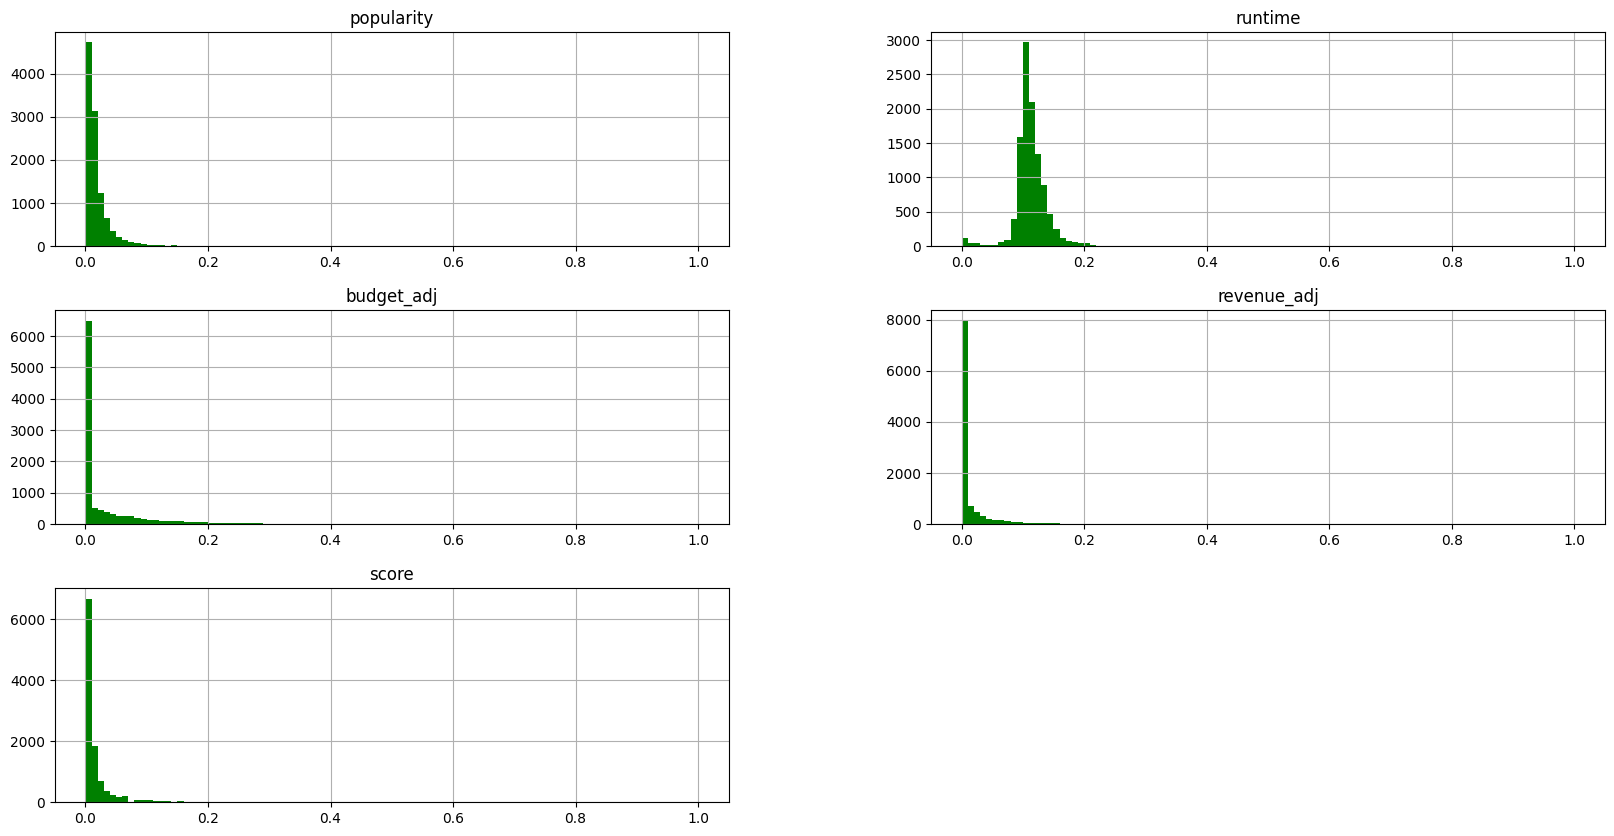

In [309]:
df[numerical_features].hist(figsize=(20, 10), color='green', bins=100)

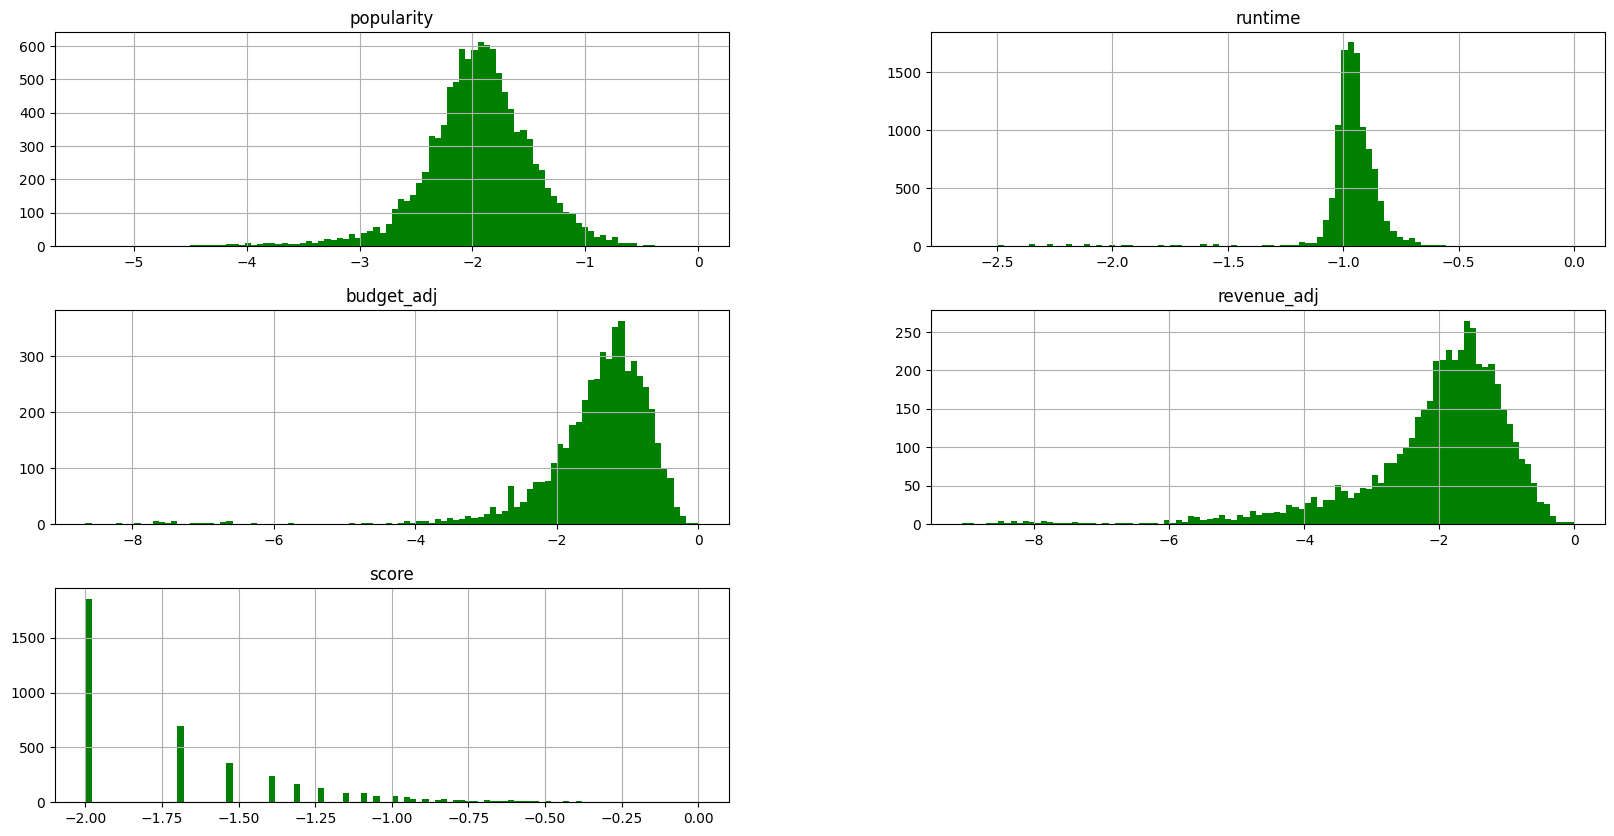

In [312]:
# Aplicando o logaritmo de base 10 apenas a valores estritamente positivos
log_data = np.log10(df[numerical_features][df[numerical_features] > 0])

# Plotando histograma em escala logarítmica (base 10)
log_data.hist(figsize=(20, 10), color='green', bins=100)

# Configurando labels e título
plt.xlabel('Log10 dos Valores')
plt.ylabel('Frequência')
plt.title('Histograma de Variáveis Numéricas em Escala Logarítmica (base 10)')

# Exibindo o histograma
plt.show()


**Bivariada**

**Multivariada**

## Análise Descritiva

### Separando os dados em numéricos e categóricos

In [ ]:
print(f'Colunas de dados numéricos: {numerical_features}')
print("Dados categóricos: 'release_year', 'streaming_services', 'genres', '5_star_score'")

Colunas de dados numéricos: ['popularity', 'runtime', 'budget_adj', 'revenue_adj', 'score']
Dados categóricos: 'release_year', 'streaming_services', 'genres', '5_star_score'


In [ ]:
df_numerical = df[numerical_features]
df_release_year = df['release_year_0',
       'release_year_1', 'release_year_2', 'release_year_3', 'release_year_4',
       'release_year_5', 'release_year_6', 'release_year_7', 'release_year_8',
       'release_year_9', 'release_year_10', 'release_year_11',
       'release_year_12', 'release_year_13']
df_streaming_services = df['Amazon Prime Video',
       'Disney Plus', 'Hulu', 'Max', 'Netflix']
df_genres = df['Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']